In [8]:
import numpy as np
import pandas as pd

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
iris = load_iris()

In [11]:
iris_data = iris['data']

In [12]:
iris_label = iris['target']

In [28]:
iris_df = pd.DataFrame(iris_data, columns=iris['feature_names'])

In [29]:
iris_df['label'] = iris_label

In [30]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
iris_df.iloc[:,:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [48]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [51]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [53]:
pred = dt_clf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

## 순서 유의

In [56]:
accuracy_score(y_test, pred)

0.9333333333333333

---

# KFold Cross Validation

## KFold

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [61]:
iris = load_iris()

In [68]:
features = iris['data']

In [63]:
label = iris['target']

In [64]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [99]:
kfold = KFold(n_splits=5)

In [66]:
cv_accuracy = []

In [104]:
n_iter = 0

for train_index, test_index in kfold.split(features):
    # kfold.split() 으로 반환된 인덱스 이용해 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f'인덱스: {n_iter}  정확도: {accuracy}')
    cv_accuracy.append(accuracy)
    
print(f'평균 점수: {np.mean(cv_accuracy)}')

인덱스: 1  정확도: 1.0
인덱스: 2  정확도: 0.9667
인덱스: 3  정확도: 0.8667
인덱스: 4  정확도: 0.9333
인덱스: 5  정확도: 0.7333
평균 점수: 0.9


## Stratified KFold

### KFold가 원본데이터의 label 분포를 split에 잘 반영하지 못하는 문제 해결

### label data가 imbalanced 할 때 유용

In [108]:
from sklearn.model_selection import StratifiedKFold

In [109]:
stk = StratifiedKFold(n_splits=3)
n_iter = 0

### KFold와 달리, label 분포도에 따라 데이터를 나누므로, split() 에 label 데이터 인자 넣어줘야 한다.

In [116]:
for train_index, test_index in stk.split(features, label):
    n_iter += 1
    print(pd.DataFrame(label[train_index]).value_counts())
    print(pd.DataFrame(label[test_index]).value_counts())

2    34
0    33
1    33
dtype: int64
0    17
1    17
2    16
dtype: int64
1    34
0    33
2    33
dtype: int64
0    17
2    17
1    16
dtype: int64
0    34
1    33
2    33
dtype: int64
1    17
2    17
0    16
dtype: int64


In [118]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [136]:
dtc = DecisionTreeClassifier(random_state=156)
stk = StratifiedKFold(n_splits=3)

In [137]:
cv_score = []

for train_index, test_index in stk.split(iris_df, iris_df['label']):
    X_train, y_train = iris_df.iloc[train_index, :-1], iris_df.iloc[train_index, -1]
    X_test, y_test = iris_df.iloc[test_index, :-1], iris_df.iloc[test_index, -1]
    
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    score = accuracy_score(y_test, pred)
    print(f'정확도: {score}')
    cv_score.append(score)

np.mean(cv_score)

정확도: 0.98
정확도: 0.94
정확도: 0.98


0.9666666666666667

## cross_val_score() - 교차검증을 더욱 간단하게

### 데이터 분할 => 데이터 학습 => 데이터 예측 => 성능 측정   : 한 번에 가능

##### cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs)
- estimator: 분류 또는 회귀 모델
- X: features
- y: target (지도학습의 경우 입력)
- scoring: 예측 성능 평가 지표 (분류 => accuracy, 회귀 => 결정계수 ) 
- cv: fold 수  (int나 None이면 분류 => StratifiedKFold, 나머지 값들은 모두 회귀 => KFold)
   
=> scoring에 해당하는 예측 성능 지표 측정값을 배열 형태로 반환

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

In [140]:
data = load_iris()['data']
target = load_iris()['target']

In [143]:
dtc = DecisionTreeClassifier(random_state=11)

In [144]:
cross_val_score(estimator=dtc, X=data, y=target, scoring='accuracy', cv=3)

array([0.98, 0.92, 0.98])

In [145]:
cross_val_score(estimator=dtc, X=data, y=target, scoring='accuracy', cv=3).mean()

0.96

### 여러 지표에 대한 점수와 걸린 시간에 대해 알고싶다면 => cross_validate()

# GridSearchCV

## 교차검증과 하이퍼 파라미터 튜닝을 한 번에!

## 학습과 예측 직접 해야함

##### GridSearchCV(estimator, param_grid, scoring, cv, refit)
- param_grid: key+리스트 값을 갖는 딕셔너리 (튜닝을 위해 사용할 파라미터 지정)
- refit: default값은 True이며 찾아낸 최적의 파라미터를 estimator에 최종 학습

In [152]:
from sklearn.model_selection import GridSearchCV

In [147]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=121)

In [154]:
dtc = DecisionTreeClassifier()

dtc_p = {'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

gt = GridSearchCV(dtc, dtc_p, cv=3)

gt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

### cv_results_로 결과 확인

In [160]:
pd.DataFrame(gt.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


### 여기도 refit=True가 default이므로 최적의값으로 자동 학습시켜 best_estimator_에 저장

### best_params, best_score_

In [167]:
gt.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [162]:
gt.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [163]:
gt.best_score_

0.975

In [169]:
pred = gt.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

## 일반적으로, 학습데이터를 GridSearchCV를 이용해 하이퍼 파라미터 튜닝 진행한 뒤 별도의 테스트에서 이를 평가하는 것이 일반적인 ML 모델 적용 방법

# 데이터 전처리

## ML 알고리즘은 결측치, 문자열 등을 입력으로 받지 않는다!!

## 1. Encoding

### LabelEncoder

In [179]:
from sklearn.preprocessing import LabelEncoder

In [181]:
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# fit, transform
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(f'인코딩 변환값: {labels}')

인코딩 변환값: [0 1 4 5 3 3 2 2]


- 어떤 값으로 encoding 됐는지 확인

In [184]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

- decoding

In [186]:
encoder.inverse_transform([3,3,3])

array(['선풍기', '선풍기', '선풍기'], dtype='<U5')

### OneHotEncoder

In [187]:
from sklearn.preprocessing import OneHotEncoder

LabelEncoder과 달리
- 2차원 데이터만 입력 가능
- 최종 결과 sparse matrix를 dense matrix로 변환

In [219]:
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 변환
items = np.array(items).reshape(-1, 1)

# fit, transform
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# dense matrix 변환
print(oh_labels.toarray())
pd.DataFrame(oh_labels.toarray()).astype(int)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


,0,1,2,3,4,5
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### get_dummies => pandas DataFrame에서 사용 가능

In [216]:
items = pd.DataFrame(items, columns=['item'])
pd.get_dummies(items)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# 스케일링

## StandardSscaler

- RBF 커널을 이용하는 SVM, LinearRegression, LogisticRegression은 데이터가 정규분포를 가지고 있다는 가정하에 구현된 것으로 사전에 표준화시 성능 향상에 중요한 요소가 될 수 있다.

In [220]:
from sklearn.preprocessing import StandardScaler

In [228]:
data = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])

In [253]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [230]:
ss = StandardScaler()

In [231]:
ss.fit(data)

StandardScaler()

In [232]:
sd = ss.transform(data)

In [243]:
pd.DataFrame(sd, columns=load_iris()['feature_names']).agg(['mean', 'std'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00


### MinMaxScaler

In [244]:
from sklearn.preprocessing import MinMaxScaler

In [246]:
mms = MinMaxScaler()

In [247]:
mms.fit(data)

MinMaxScaler()

In [248]:
sd = mms.transform(data)

In [252]:
pd.DataFrame(sd, columns=load_iris()['feature_names']).agg(['min', 'max'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


### <주의> train data에 대해서만 fit, test data는 fit하면 안됨!
- 학습 시점에 test data에 대한 정보는 모르는 상태여야 함
- test data에 대해 따로 fit을 진행하면 동일한 값에 대해 train과 test에서 다르게 scaling됨

# 실제 데이터 분석해보기

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('titanic_train.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [17]:
df['Age'].isna().sum()

0

In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df.fillna('N', inplace=True)

In [23]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [26]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

### Cabin의 앞글자 추출

In [34]:
df['Cabin'].str[0].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [28]:
df['Cabin'].map(lambda x: x[0]).value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### 성별에 따른 생존률 확인

In [44]:
df.groupby(['Sex', 'Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

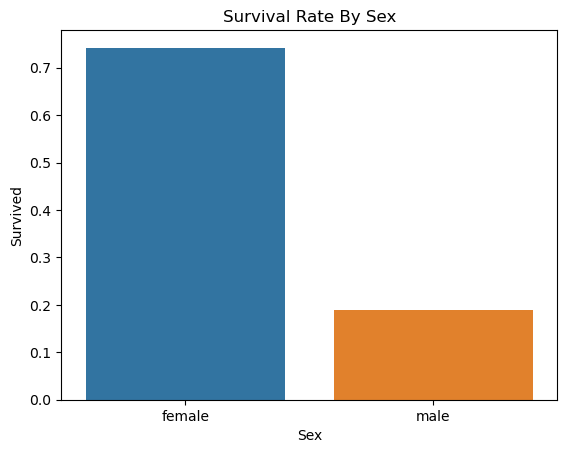

In [40]:
sex_survived = df.groupby('Sex')['Survived'].mean().reset_index()

plt.figure()
sns.barplot(data=sex_survived, x='Sex', y='Survived')
plt.title('Survival Rate By Sex')
plt.show()

### 그냥 Survived만 해도 생존률이 나오네??

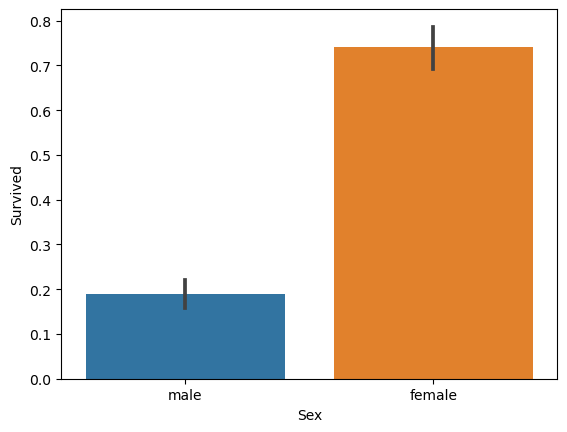

In [46]:
plt.figure()
sns.barplot(data=df, x='Sex', y='Survived')
plt.show()

### 객실등급, 성별에 따른 생존률

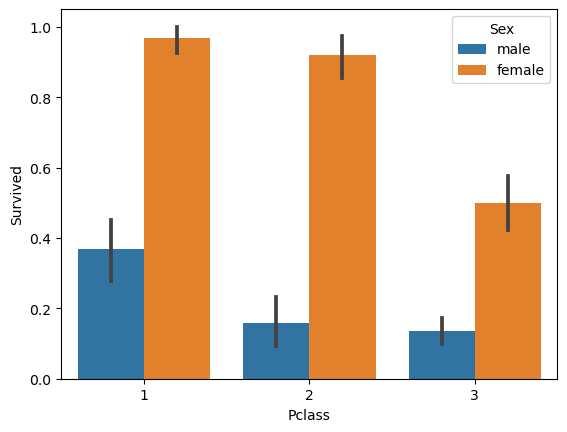

In [47]:
plt.figure()
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.show()

### 연령별 생존률

In [67]:
df['Age_band'] = 0

def age_band(x):
    if x < 0:
        return 'Unknown'
    elif x<=5:
        return 'Baby'
    elif x<=12:
        return 'Child'
    elif x<=18:
        return 'Teenager'
    elif x<=25:
        return 'Student'
    elif x<=35:
        return 'Young Adult'
    elif x<=60:
        return 'Adult'
    else:
        return 'Elderly'
    
df['Age_cat'] = df['Age'].map(age_band)

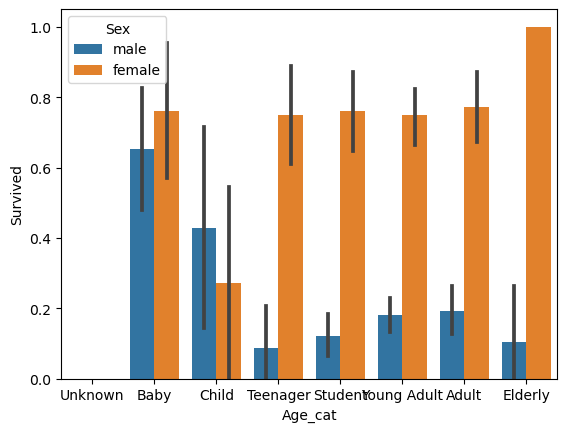

In [68]:
plt.figure()
sns.barplot(data=df, x='Age_cat', y='Survived', order=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly'], hue='Sex')
plt.show()

In [69]:
df.drop('Age_cat', axis=1, inplace=True)

### 문자열 변수 인코딩

In [70]:
from sklearn.preprocessing import LabelEncoder

In [86]:
def encode_features(x):
    features = ['Cabin', 'Sex', 'Embarked']
    
    for f in features:
        le= LabelEncoder()
        x[f] = le.fit_transform(x[f])
        
    return x

df = encode_features(df)

### 불필요 컬럼 제거

In [88]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

### 데이터 분리

In [95]:
from sklearn.model_selection import train_test_split

In [92]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

### 모델 학습 데이터 예측

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [99]:
dt = DecisionTreeClassifier(random_state=11)
lr = LogisticRegression(solver='liblinear', random_state=11)
rf = RandomForestClassifier(random_state=11)

In [103]:
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print(f'DecisionTreeClassifier 정확도: {accuracy_score(y_test, pred):.3f}')

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(f'LogisticRegression 정확도: {accuracy_score(y_test, pred):.3f}')

rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(f'RandomForestClassifier 정확도: {accuracy_score(y_test, pred):.3f}')

DecisionTreeClassifier 정확도: 0.816
LogisticRegression 정확도: 0.855
RandomForestClassifier 정확도: 0.860


### CrossValidation

In [106]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

### 방법 1 (KFold)

In [117]:
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(df)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        
        print(f'교차검증 {iter_count} 정확도: {accuracy_score(y_test, pred)}')
        scores.append(accuracy_score(y_test, pred))
        
    print(f'평균 정확도: {np.mean(scores)}')

exec_kfold(dt)

교차검증 0 정확도: 0.7541899441340782
교차검증 1 정확도: 0.7752808988764045
교차검증 2 정확도: 0.8033707865168539
교차검증 3 정확도: 0.7808988764044944
교차검증 4 정확도: 0.797752808988764
평균 정확도: 0.782298662984119


### 방법2 (cross_val_score)

In [124]:
cross_val_score(dt, X_train, y_train, cv=5)

array([0.74125874, 0.75524476, 0.75352113, 0.78873239, 0.78873239])

In [126]:
cross_val_score(dt, X_train, y_train, cv=5).mean()

0.7654978823992907

### 방법3 (GridSearchCV)

In [123]:
params = {'max_depth': [2, 3, 5, 10],
                   'min_samples_split': [2, 3, 5],
                   'min_samples_leaf': [1, 5, 8]}

gs = GridSearchCV(dt, param_grid=params, cv=5, scoring='accuracy')

In [127]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [130]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [128]:
gs.best_score_

0.8034768048852555

In [129]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=11)

In [132]:
best = gs.best_estimator_
pred = best.predict(X_test)

In [134]:
accuracy_score(y_test, pred)

0.8659217877094972